In [17]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


from sklearn.model_selection import learning_curve
import numpy as np
import pandas as pd

In [4]:
%run "./../all_numerical_data.ipynb"

In [7]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create the bagging classifier with a decision tree as the base classifier
clf = BaggingClassifier(DecisionTreeClassifier())

# Define the parameter grid to search over
param_grid = {
    "n_estimators": [10, 50, 100],
    "max_samples": [0.5, 0.8, 1.0],
    "max_features": [0.5, 0.8, 1.0],
    "base_estimator__max_depth": [1, 3, 5],
    "base_estimator__min_samples_split": [2, 5, 10]
}

# Create the grid search object
grid_search = GridSearchCV(clf, param_grid)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Print the best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_:.2f}")

Best Parameters: {'base_estimator__max_depth': 5, 'base_estimator__min_samples_split': 5, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
Best Score: 0.93


In [10]:
# create a bagging classifier with a decision tree as the base classifier
# using the best parameters found by the grid search
clf = BaggingClassifier(
    DecisionTreeClassifier(
        max_depth=grid_search.best_params_["base_estimator__max_depth"],
        min_samples_split=grid_search.best_params_["base_estimator__min_samples_split"]
    ),
    n_estimators=grid_search.best_params_["n_estimators"],
    max_samples=grid_search.best_params_["max_samples"],
    max_features=grid_search.best_params_["max_features"]
)

# fit the classifier to the training data
clf.fit(x_train, y_train)

# predict the labels of the test set
y_pred = clf.predict(x_val)

# print the accuracy score using classification_report
print(classification_report(y_val, y_pred))


              precision    recall  f1-score   support

Body Level 1       0.91      0.94      0.93        34
Body Level 2       0.89      0.74      0.81        42
Body Level 3       0.89      0.94      0.91        80
Body Level 4       0.98      0.99      0.99       140

    accuracy                           0.94       296
   macro avg       0.92      0.90      0.91       296
weighted avg       0.93      0.94      0.93       296



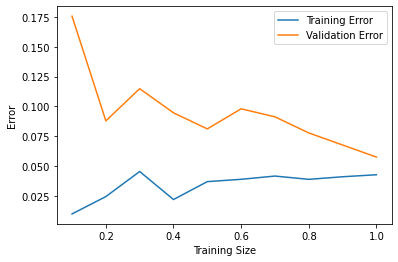

In [15]:
# Number of training examples to try
train_sizes = np.linspace(0.1, 1.0, 10)

# Lists to store the training and validation errors
train_errors = []
val_errors = []

for train_size in train_sizes:
    # Get the current number of training examples
    n_train = int(train_size * len(x_train))
    
    # Get the current training data
    x_train_curr = x_train[:n_train]
    y_train_curr = y_train[:n_train]
    
    # Fit the classifier to the current training data
    clf.fit(x_train_curr, y_train_curr)
    
    # Make predictions on the current training and validation data
    train_pred = clf.predict(x_train_curr)
    val_pred = clf.predict(x_val)
    
    # Calculate the training and validation errors
    train_error = 1 - accuracy_score(y_train_curr, train_pred)
    val_error = 1 - accuracy_score(y_val, val_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the learning curve
plt.plot(train_sizes, train_errors, label="Training Error")
plt.plot(train_sizes, val_errors, label="Validation Error")
plt.xlabel("Training Size")
plt.ylabel("Error")
plt.legend()
plt.show()

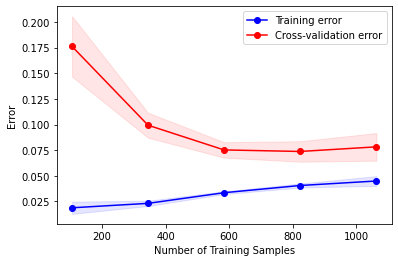

In [18]:
X = np.concatenate((x_train, x_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
train_sizes, train_scores, val_scores = learning_curve(clf, X, y, cv=5)
train_error = 1 - train_scores
val_error = 1 - val_scores

# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_std = np.std(train_scores, axis=1)
# val_scores_mean = np.mean(val_scores, axis=1)
# val_scores_std = np.std(val_scores, axis=1)

# plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
#                  train_scores_mean + train_scores_std, alpha=0.1,
#                  color="r")
# plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
#                  val_scores_mean + val_scores_std, alpha=0.1,
#                  color="g")
# plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
#          label="Training score")
# plt.plot(train_sizes, val_scores_mean, 'o-', color="r",
#          label="Cross-validation score")
# plt.xlabel('Number of Training Samples')
# plt.ylabel('Accuracy Score')
# plt.legend(loc="best")
# plt.show()

train_error_mean = np.mean(train_error, axis=1)
train_error_std = np.std(train_error, axis=1)
val_error_mean = np.mean(val_error, axis=1)
val_error_std = np.std(val_error, axis=1)

plt.fill_between(train_sizes, train_error_mean - train_error_std,
                    train_error_mean + train_error_std, alpha=0.1,
                    color="b")
plt.fill_between(train_sizes, val_error_mean - val_error_std,
                    val_error_mean + val_error_std, alpha=0.1,
                    color="r")
plt.plot(train_sizes, train_error_mean, 'o-', color="b",
            label="Training error")
plt.plot(train_sizes, val_error_mean, 'o-', color="r",
            label="Cross-validation error")
plt.xlabel('Number of Training Samples')
plt.ylabel('Error')
plt.legend(loc="best")
plt.show()


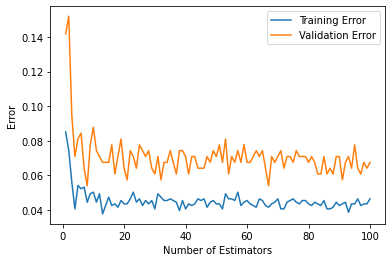

In [16]:
n_estimators = range(1, 101)

# Lists to store the training and validation errors
train_errors = []
val_errors = []

for n in n_estimators:
    # Create the bagging classifier with a decision tree as the base classifier
    clf = BaggingClassifier(
    DecisionTreeClassifier(
        max_depth=grid_search.best_params_["base_estimator__max_depth"],
        min_samples_split=grid_search.best_params_["base_estimator__min_samples_split"]
    ),
    n_estimators=n,
    max_samples=grid_search.best_params_["max_samples"],
    max_features=grid_search.best_params_["max_features"]
)
    # Fit the classifier to the training data
    clf.fit(x_train, y_train)
    
    # Make predictions on the training and validation data
    train_pred = clf.predict(x_train)
    val_pred = clf.predict(x_val)
    
    # Calculate the training and validation errors
    train_error = 1 - accuracy_score(y_train, train_pred)
    val_error = 1 - accuracy_score(y_val, val_pred)
    
    # Append the errors to the lists
    train_errors.append(train_error)
    val_errors.append(val_error)

# Plot the training and validation errors against the number of estimators
plt.plot(n_estimators, train_errors, label="Training Error")
plt.plot(n_estimators, val_errors, label="Validation Error")
plt.xlabel("Number of Estimators")
plt.ylabel("Error")
plt.legend()
plt.show()